# Tutorial Practice 1

# Imports


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Functions

In [34]:
def correlation_coeff(x, y, n):
  x_ = np.mean(x)
  y_ = np.mean(y)
  x_x_ = x - x_
  y_y_ = y - y_
  xy = x_x_ * y_y_
  num = sum(xy)
  dem = sum(pow(x_x_, 2)) * sum(pow(y_y_, 2))
  return num / pow(dem, 0.5)

def lin_al(x, y, n):
  x_2 = x * x
  xy = x * y
  intercept = ((sum(y) * sum(x_2)) - (sum(x) * sum(xy))) / ((n * sum(x_2)) - (pow(sum(x), 2)))
  slope = ((n * sum(xy)) - (sum(x) * sum(y))) / ((n * sum(x_2)) - pow(sum(x), 2))
  return intercept, slope

def least_squares(x, y, i, s):
  diff = y - (i + s * x)
  err = np.mean(pow(diff, 2))
  return pow(err, 0.5)

def pred(x, i, s):
  return i + s * x

def plot(x, y, i, s, pred=np.array([])):
  x = np.sort(x)
  fig, ax = plt.subplots(1, 1)
  ax.scatter(x, y, label = "Data")
  ax.plot(x, i + s * x, label = "Prediction", color = 'r')
  ax.scatter(pred, i + s * pred, label = "Value", color = 'g')
  fig.legend()
  plt.show(fig)

#1

In [5]:
x = np.array([2, 3, 5, 7, 9])
y = np.array([4, 5, 7, 10, 15])

In [410]:
i, s = lin_al(x, y, 5)
print("Intercept:", i, "Slope:", s)

Intercept: 0.3048780487804878 Slope: 1.5182926829268293


In [411]:
correlation_coeff(x, y, 5)

0.9795560970827194

In [412]:
least_squares(x, y, i, s)

0.7986268703523449

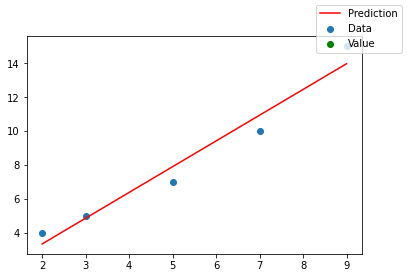

In [413]:
plot(x, y, i, s)

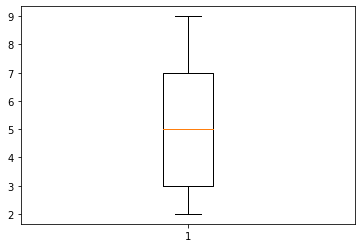

In [414]:
plt.boxplot(x)
plt.show()

#2

In [415]:
x = np.array([14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2])
y = np.array([215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408])

In [416]:
correlation_coeff(x, y, 12)

0.9575066230015952

In [417]:
i, s = lin_al(x, y, 12)
print(i, s)

-159.47415234086318 30.08786179424521


In [418]:
least_squares(x, y, i, s)

34.804573952003956

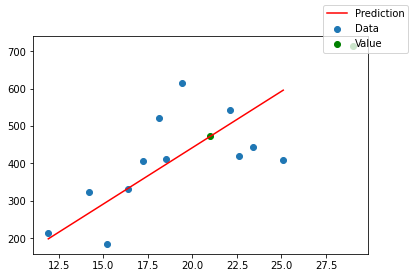

In [419]:
plot(x, y, i, s, np.array([21, 29]))

In [420]:
pred(21, i, s)

472.3709453382862

In [421]:
pred(29, i, s)

713.0738396922479

In [26]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.regressors = None
        self.bias = None
        self.trained = False

    def fit(self, x, y,verbose = 0, lr = None, epochs = None):
        if epochs is None:
            epochs = self.n_iters
        
        if lr is None:
            lr = self.lr

        # Initialize the Weights and Biases
        n_samples, n_features = x.shape
        self.regressors = np.zeros(n_features)
        self.bias = 0

        # Do the training process
        for _ in range(epochs):
            # Calculate the outputs
            y_predicted = np.dot(x, self.regressors) + self.bias

            # Do the gradient descent
            dw = (1/n_samples) * np.dot(x.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            loss = self.mse(y_predicted, y)
            if verbose >= 1:
                print(f"Epoch: {_ + 1} / {epochs} \n loss: {loss}")

            # Updating the weights and bias
            self.regressors -= dw * lr
            self.bias -= db * lr
        
        self.trained = True
    
    def mse(self, y_hat, y):
        # Return the Mean Squared Error ( MSE )
        return np.mean((y - y_hat) ** 2)
    
    def predict(self, x):
        # Predict Method to do some predictions on test data
        if self.trained:
            y_pred = np.dot(x, self.regressors) + self.bias
            return y_pred
        else:
            print("The Model hasn't trained yet!")
    
    def evaluate(self, x, y):
        if self.trained:
            y_predicted = self.predict(x)
            return self.mse(y_predicted, y)
        else:
            print("The Model hasn't trained yet!")

In [36]:
x = np.array([2, 3, 5, 7, 9])
y = np.array([4, 5, 7, 10, 15])

In [37]:
x = x.reshape(-1, 1)

In [38]:
lr = LinearRegression(lr = 0.01, n_iters = 1000)
lr.fit(x, y, verbose=1)

Epoch: 1 / 1000 
 loss: 83.0
Epoch: 2 / 1000 
 loss: 36.071610400000004
Epoch: 3 / 1000 
 loss: 15.882392000783998
Epoch: 4 / 1000 
 loss: 7.19672021123727
Epoch: 5 / 1000 
 loss: 3.4600269713962235
Epoch: 6 / 1000 
 loss: 1.852450043516696
Epoch: 7 / 1000 
 loss: 1.160847239248165
Epoch: 8 / 1000 
 loss: 0.8633086760792713
Epoch: 9 / 1000 
 loss: 0.7353017904760076
Epoch: 10 / 1000 
 loss: 0.6802296913189234
Epoch: 11 / 1000 
 loss: 0.6565351130136952
Epoch: 12 / 1000 
 loss: 0.6463395679079216
Epoch: 13 / 1000 
 loss: 0.6419514931234196
Epoch: 14 / 1000 
 loss: 0.6400618761235652
Epoch: 15 / 1000 
 loss: 0.6392471357381717
Epoch: 16 / 1000 
 loss: 0.6388948284134527
Epoch: 17 / 1000 
 loss: 0.6387414727718932
Epoch: 18 / 1000 
 loss: 0.6386737155992563
Epoch: 19 / 1000 
 loss: 0.6386427908112591
Epoch: 20 / 1000 
 loss: 0.6386277185648764
Epoch: 21 / 1000 
 loss: 0.6386194730272325
Epoch: 22 / 1000 
 loss: 0.638614171139485
Epoch: 23 / 1000 
 loss: 0.6386101423325878
Epoch: 24 / 1000

In [39]:
lr.evaluate(x, y)

0.6378241314075506

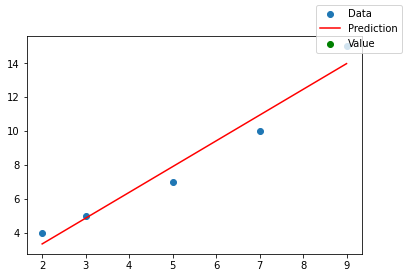

In [40]:
plot(x, y, lr.bias, lr.regressors[0])

In [54]:
x = np.array([14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2])
y = np.array([215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408])

In [55]:
lr = LinearRegression(lr = 0.01, n_iters = 300)
lr.fit(x.reshape(-1, 1), y, verbose=1)

Epoch: 1 / 300 
 loss: 176502.08333333334
Epoch: 2 / 300 
 loss: 1220939.8185966662
Epoch: 3 / 300 
 loss: 8525851.950263469
Epoch: 4 / 300 
 loss: 59617178.571916096
Epoch: 5 / 300 
 loss: 416955280.2214198
Epoch: 6 / 300 
 loss: 2916215443.9636326
Epoch: 7 / 300 
 loss: 20396303143.505314
Epoch: 8 / 300 
 loss: 142653869738.87155
Epoch: 9 / 300 
 loss: 997736112242.8688
Epoch: 10 / 300 
 loss: 6978270992851.841
Epoch: 11 / 300 
 loss: 48806759154898.414
Epoch: 12 / 300 
 loss: 341359592112229.9
Epoch: 13 / 300 
 loss: 2387504787219166.5
Epoch: 14 / 300 
 loss: 1.6698458870749874e+16
Epoch: 15 / 300 
 loss: 1.1679077258860435e+17
Epoch: 16 / 300 
 loss: 8.168469118870195e+17
Epoch: 17 / 300 
 loss: 5.713112968348272e+18
Epoch: 18 / 300 
 loss: 3.9958111261885735e+19
Epoch: 19 / 300 
 loss: 2.7947122076230353e+20
Epoch: 20 / 300 
 loss: 1.9546510274841818e+21
Epoch: 21 / 300 
 loss: 1.3671034279749772e+22
Epoch: 22 / 300 
 loss: 9.561664749878521e+22
Epoch: 23 / 300 
 loss: 6.687528603

In [56]:
lr.evaluate(x.reshape(-1, 1), y)

4.579316015711288e+258

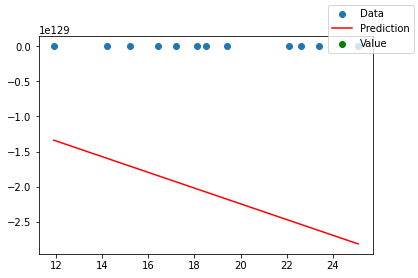

In [57]:
plot(x, y, lr.bias, lr.regressors[0])